In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
weather = pd.read_csv('../data/input/weather.csv')
weather.Date = pd.DatetimeIndex(weather.Date)
weather.PrecipTotal = weather.PrecipTotal.str.strip() # to remove the leading spaces
weather = weather.replace('T', 0.005)
weather = weather.replace('M', np.nan)

In [52]:
weather['Year'] = pd.DatetimeIndex(weather.Date).year
weather['Month'] = pd.DatetimeIndex(weather.Date).month

In [53]:
weather.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Station,2944,NaN,NaN,NaN,NaN,NaN,1.5,0.500085,1,1,1.5,2,2
Date,2944,1472,2014-08-27 00:00:00,2,2007-05-01 00:00:00,2014-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tmax,2944,NaN,NaN,NaN,NaN,NaN,76.1661,11.462,41,69,78,85,104
Tmin,2944,NaN,NaN,NaN,NaN,NaN,57.8105,10.3819,29,50,59,66,83
Tavg,2933,59,73,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depart,1472,41,2,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DewPoint,2944,NaN,NaN,NaN,NaN,NaN,53.4579,10.6752,22,46,54,62,75
WetBulb,2940,47,63,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat,2933,30,0,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cool,2933,30,0,1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df = weather[weather.notnull()]
df.Station = ["O'Hare" if i ==1 for i in df.Station]
df.describe()

SyntaxError: invalid syntax (<ipython-input-80-802230229eda>, line 2)

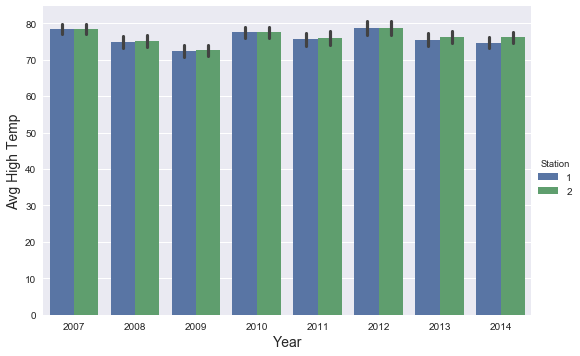

In [81]:
g = sns.factorplot(x='Year',y='Tmax',hue='Station',data=df, kind='bar',size=5,aspect=1.5)
# g.ax.set_title('Weather between stations is comparable',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Avg High Temp',fontsize=14)
plt.savefig('temp_weather.png')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

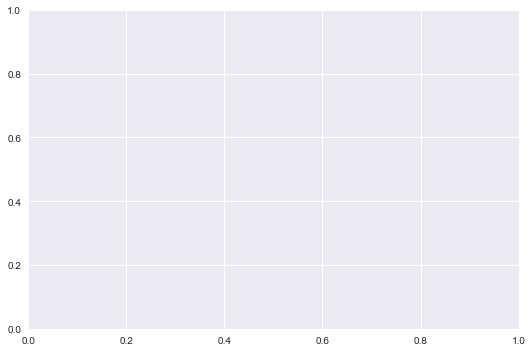

In [79]:
g = sns.factorplot(x='Year',y='AvgSpeed',hue='Station',data=df, kind='bar',size=5,aspect=1.5)
g.ax.set_title('Weather between stations is comparable',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Avg Wind Speed',fontsize=14)
plt.savefig('Wind_weather.png')

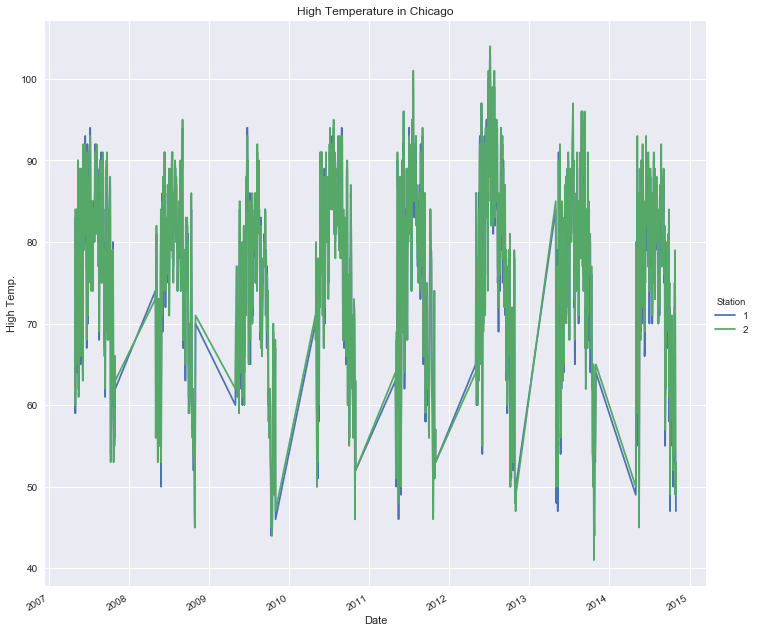

In [68]:
g = sns.FacetGrid(df,hue='Station',size=10)
g.map(plt.plot, 'Date','Tmax').add_legend()
g.ax.set(xlabel='Date',
         ylabel='High Temp.',
         title='High Temperature in Chicago')
g.fig.autofmt_xdate()


In [88]:
train = pd.read_csv('../data/input/train.csv')
train.Date = pd.DatetimeIndex(train.Date)
train['year'] = pd.DatetimeIndex(train.Date).year

In [93]:
mosq_by_year = list(train.groupby('year')['NumMosquitos'].sum())

In [96]:
list(mosq_by_year)

[58688, 21108, 18799, 36444]

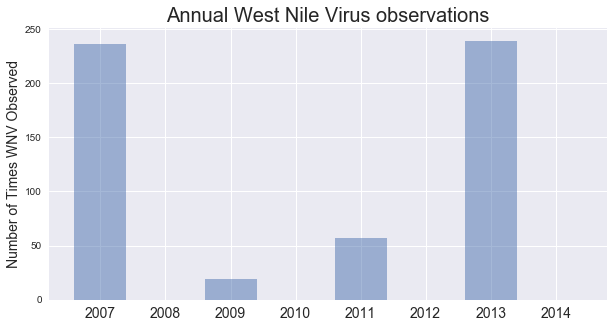

In [104]:
objects = ('2007', '2008', '2009', '2010', '2011', '2012','2013','2014')
y_pos = np.arange(len(objects))
mosq_by_year = list(train.groupby('year')['WnvPresent'].sum())
mosquitos = [mosq_by_year[0],0,mosq_by_year[1],0,mosq_by_year[2],0,mosq_by_year[3],0]
plt.figure(figsize=(10,5)) 
plt.bar(y_pos, mosquitos, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=14)
plt.ylabel('Number of Times WNV Observed',fontsize=14)
plt.title('Annual West Nile Virus observations',fontsize=20)
plt.savefig('annual_obs.png')
plt.show()